<a href="https://colab.research.google.com/github/meghanabaradhya/BrainTumourClassificationUsingCnn/blob/main/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential


In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
pip install yfinance

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo("^NSEI", start="2019-01-01", end="2024-08-03")

print(df)


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   
...                  ...           ...           ...           ...   
2024-03-01  22048.300781  22353.300781  22047.750000  22338.750000   
2024-03-04  22403.500000  22440.900391  22358.300781  22405.599609   
2024-03-05  22371.250000  22416.900391  22269.150391  22356.300781   
2024-03-06  22327.500000  22497.199219  22224.349609  22474.050781   
2024-03-07  22505.300781  22525.650391  22430.000000  22493.550781   

               Adj Close  Volume  
Date                              
2019-01-02  10792.5

In [ ]:
df.shape

(1279, 6)

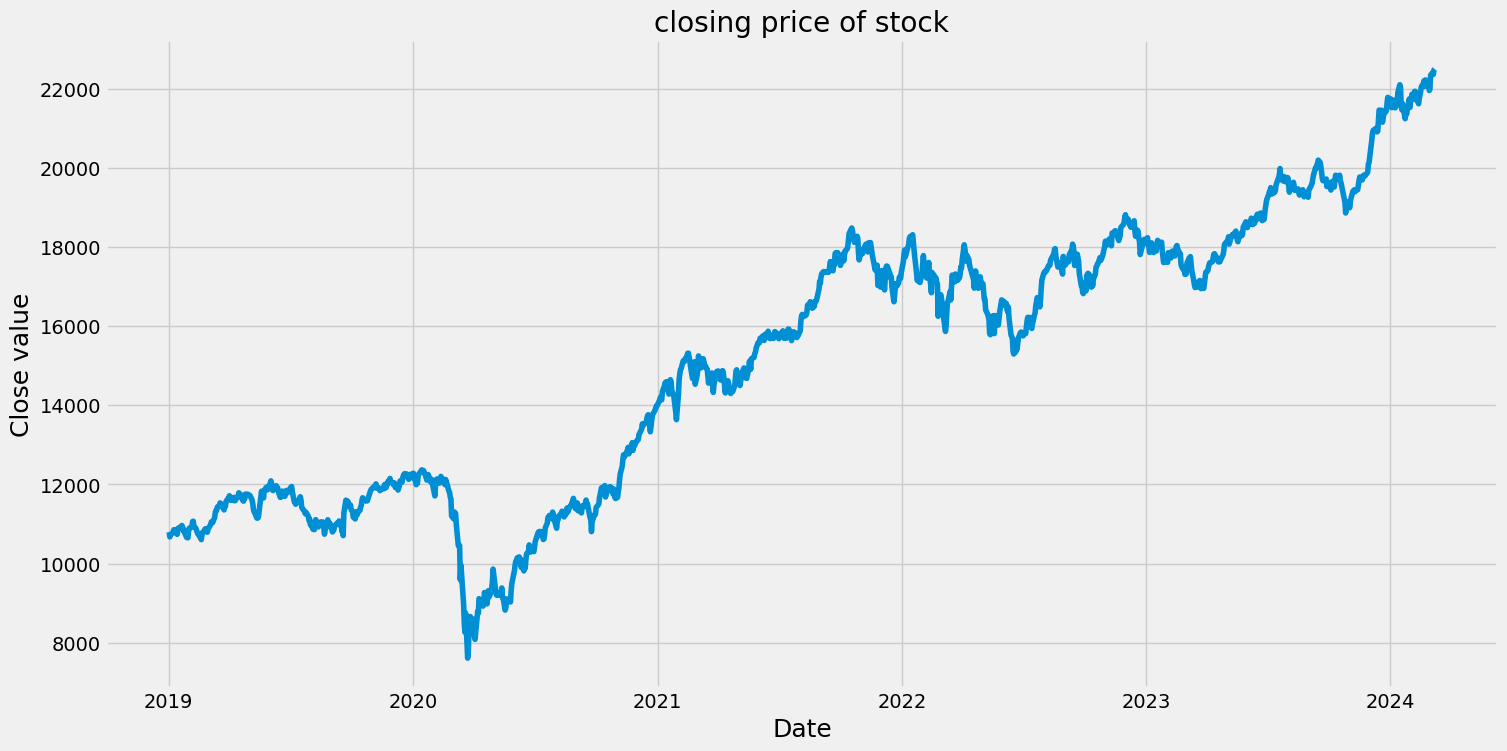

In [ ]:
plt.figure(figsize=(16,8))
plt.title("closing price of stock")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close value",fontsize=18)
plt.show()


In [ ]:
data=df.filter(['Close'])

print(data)

                   Close
Date                    
2019-01-02  10792.500000
2019-01-03  10672.250000
2019-01-04  10727.349609
2019-01-07  10771.799805
2019-01-08  10802.150391
...                  ...
2024-03-01  22338.750000
2024-03-04  22405.599609
2024-03-05  22356.300781
2024-03-06  22474.050781
2024-03-07  22493.550781

[1279 rows x 1 columns]


In [ ]:
dataset=data.values # converting into numpy



In [ ]:
training_dataset_len=math.ceil(len(dataset)*0.8)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
## converts value between 0 and 1
scaler_data=scaler.fit_transform(dataset)
scaler_data.shape

(1279, 1)

In [ ]:
# split into training and testing
scaled_training_dataset=scaler_data[:training_dataset_len,:]
## split into input(x_values) and output(y_values)


x_train=[]
y_train=[]

for i in range(60,training_dataset_len):
  x_train.append(scaled_training_dataset[i-60:i,0])
  y_train.append(scaled_training_dataset[i,0])

In [ ]:

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
## reshaping is done because lstm will accept only 3d

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
from keras.layers import LSTM,Dense

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:

model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
964/964 [==============================] - 36s 20ms/step - loss: 0.0030
Epoch 2/5
964/964 [==============================] - 11s 11ms/step - loss: 0.0011
Epoch 3/5
964/964 [==============================] - 10s 10ms/step - loss: 9.3140e-04
Epoch 4/5
964/964 [==============================] - 9s 10ms/step - loss: 6.9742e-04
Epoch 5/5
964/964 [==============================] - 10s 10ms/step - loss: 5.0390e-04


In [ ]:
test_data=scaler_data[training_dataset_len-60: ,:]


print(test_data.shape)
x_test=[]
y_test=dataset[training_dataset_len:,:]

(315, 1)


In [ ]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:


len(x_test)

255

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(255, 60, 1)

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 6ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)

rmse

852.3433363970588

<ipython-input-35-20f8ab18c6a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


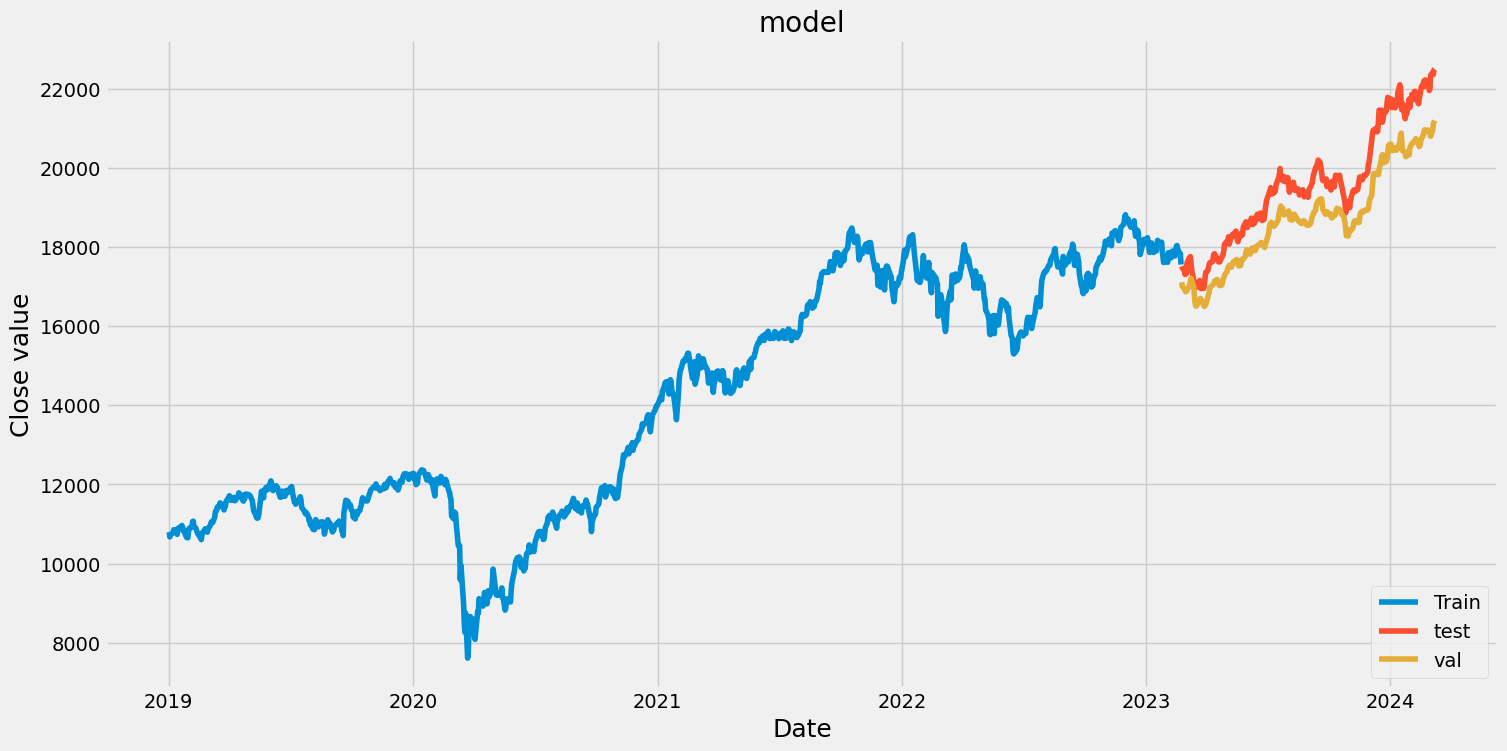

In [ ]:
train=data[:training_dataset_len]
valid=data[training_dataset_len:]
valid['Predictions']=predictions



# plot

plt.figure(figsize=(16,8))
plt.title("model")
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close value",fontsize=18)
plt.legend(['Train','test','val'],loc='lower right')
plt.show()

